#### Importing the Libraries.

# Principal Component Analysis (PCA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [ ]:
# Code for filtering out the warning.
warnings.filterwarnings("ignore")

In [ ]:
# code to show all the columns in the table
pd.set_option("display.max_columns", None)

#### Creating the data frame.

In [ ]:
adult_df = pd.read_csv(r"D:\data science\Python - Anaconda\PCA (Principal Component Analysis)\PCA\adult_data.csv",
                      header = None, index_col = None, delimiter=' *, *')
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult_df.shape

(32561, 15)

In [ ]:
adult_df.columns = ['age','workclass','fnlwgt','education','education_num',
                   'marital_status','occupation','relationship','race','sex',
                   'capital_gain','capital_loss','hours_per_week',
                   'native_country','income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Pre-processing the data.

#### Making a copy of the dataset.

In [ ]:
adult_df_rev = pd.DataFrame.copy(adult_df)
adult_df_rev.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Feature Selection.

In [ ]:
# from above data we can say that education and flnwgt is not required to predict the income.
# education has one more representation in data by the variable "education_num"
# thus education can be removed.

In [ ]:
adult_df_rev = adult_df_rev.drop(["fnlwgt","education"], axis = 1)
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Handling the missing values.

In [ ]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
# Above data shows there are no missing values but
# as per instructions we have missing values in the dataset
# these missing values are not in traditional "NA" or "Nan" form

In [ ]:
# Thus to find the missing values in data we will use following method
# in this we will check all the unique values in data

In [ ]:
for i in adult_df_rev.columns:
    print(adult_df_rev[i].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3

In [ ]:
# From above result we can see that
# missing values are in "?" form
# thus we need to replace "?" with "NA"

In [ ]:
adult_df_rev = adult_df_rev.replace(["?"], np.nan)
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [ ]:
# Thus from above we can see that dataset has missing values.
# Now we have to replace these missing values with measure of central tendancy
# in this case we have to replace them with modes of the respective veriables.

In [ ]:
for i in ["workclass","occupation","native_country"]:
    adult_df_rev[i].fillna(adult_df_rev[i].mode()[0], inplace = True)

In [ ]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
# Thus from above we can see that we have removed all the missing values.

#### Outlier Handling.

In [ ]:
adult_df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education_num   32561 non-null  int64 
 3   marital_status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital_gain    32561 non-null  int64 
 9   capital_loss    32561 non-null  int64 
 10  hours_per_week  32561 non-null  int64 
 11  native_country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [ ]:
adult_df_rev.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# from above we can see that the dataset doesnt have Outlier as such.
# thus we dont have to perform outlier handling.

## Encoding of categorical variables into numerical.

In [ ]:
colname = []

for i in adult_df_rev.columns:
    if(adult_df_rev[i].dtype == "object"):
        colname.append(i)

colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in colname:
    adult_df_rev[i] = le.fit_transform(adult_df_rev[i])

    le_name_mapping = list(zip(le.classes_, le.transform(le.classes_)))
    print("Feature :", i)
    print("Mapping :", le_name_mapping)

Feature : workclass
Mapping : [('Federal-gov', 0), ('Local-gov', 1), ('Never-worked', 2), ('Private', 3), ('Self-emp-inc', 4), ('Self-emp-not-inc', 5), ('State-gov', 6), ('Without-pay', 7)]
Feature : marital_status
Mapping : [('Divorced', 0), ('Married-AF-spouse', 1), ('Married-civ-spouse', 2), ('Married-spouse-absent', 3), ('Never-married', 4), ('Separated', 5), ('Widowed', 6)]
Feature : occupation
Mapping : [('Adm-clerical', 0), ('Armed-Forces', 1), ('Craft-repair', 2), ('Exec-managerial', 3), ('Farming-fishing', 4), ('Handlers-cleaners', 5), ('Machine-op-inspct', 6), ('Other-service', 7), ('Priv-house-serv', 8), ('Prof-specialty', 9), ('Protective-serv', 10), ('Sales', 11), ('Tech-support', 12), ('Transport-moving', 13)]
Feature : relationship
Mapping : [('Husband', 0), ('Not-in-family', 1), ('Other-relative', 2), ('Own-child', 3), ('Unmarried', 4), ('Wife', 5)]
Feature : race
Mapping : [('Amer-Indian-Eskimo', 0), ('Asian-Pac-Islander', 1), ('Black', 2), ('Other', 3), ('White', 4)]


In [ ]:
# Thus from above for dependent variable i.e. income
# 0 --> <=50k
# 1 --> >50k

In [ ]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [ ]:
# Thus from above we can see that encoding has been successful.

## Create X & Y

In [ ]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]
Y = Y.astype(int)

In [ ]:
print(X)

[[39  6 13 ...  0 40 38]
 [50  5 13 ...  0 13 38]
 [38  3  9 ...  0 40 38]
 ...
 [58  3  9 ...  0 40 38]
 [22  3  9 ...  0 20 38]
 [52  4  9 ...  0 40 38]]


In [ ]:
print(Y)

[0 0 0 ... 0 0 1]


In [ ]:
# Thus from above we cam say that creation of X & Y is complete.

## Spliting the data.

In [ ]:
# splitting the data into training and testing data set.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [ ]:
print(X_train)

[[20  3 10 ...  0 15 38]
 [32  3  9 ...  0 40 38]
 [37  3  9 ...  0 40 38]
 ...
 [19  3 10 ...  0 40 38]
 [34  3  7 ...  0 40 20]
 [19  3  9 ...  0 40 38]]


In [ ]:
print(X_test)

[[58  6  9 ...  0 16 38]
 [23  1  9 ...  0 40 38]
 [41  3 11 ...  0 60 38]
 ...
 [64  1  7 ...  0 40 38]
 [33  3 11 ...  0 45 38]
 [90  3 13 ...  0 45 38]]


In [ ]:
print(Y_train)

[0 1 1 ... 0 0 0]


In [ ]:
print(Y_test)

[0 0 1 ... 1 0 0]


## Scaling the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Applying the PCA.  (For Feature Selection)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.17179376 0.09693511 0.09261766 0.08972459 0.08663778 0.08176419
 0.08053327 0.0744331  0.07230738 0.06430992 0.05664846 0.03229477]


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.75)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.17179376 0.09693511 0.09261766 0.08972459 0.08663778 0.08176419
 0.08053327 0.0744331 ]


#### How to find PCA components?

In [ ]:
pca.n_components_

8

## Building the Logistic Regression Model.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Build the model.
model = LogisticRegression()

# Train the model.
model.fit(X_train, Y_train)

# Predict using model
Y_pred = model.predict(X_test)

In [ ]:
print(list(zip(Y_test, Y_pred)))

[(0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

## Evaluating the Building model.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion Matrix = ")
print(confusion_matrix(Y_test, Y_pred), "\n")
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred), "\n")
print("Classification Report = ")
print(classification_report(Y_test, Y_pred))

Confusion Matrix = 
[[7008  415]
 [1280 1066]] 

Accuracy Score =  0.8264919643771113 

Classification Report = 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7423
           1       0.72      0.45      0.56      2346

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769



In [ ]:
# Now for n_components = 0.75 we get accuracy = 82.64 % --> variables needs = 8

### Now if we put n_components = 0.85

In [ ]:
# splitting the data into training and testing data set.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.17179376 0.09693511 0.09261766 0.08972459 0.08663778 0.08176419
 0.08053327 0.0744331  0.07230738 0.06430992]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Build the model.
model = LogisticRegression()

# Train the model.
model.fit(X_train, Y_train)

# Predict using model
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion Matrix = ")
print(confusion_matrix(Y_test, Y_pred), "\n")
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred), "\n")
print("Classification Report = ")
print(classification_report(Y_test, Y_pred))

Confusion Matrix = 
[[7012  411]
 [1318 1028]] 

Accuracy Score =  0.8230115672023749 

Classification Report = 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7423
           1       0.71      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [ ]:
# Thus now for n_components = 0.85 we get accuracy = 82.30 % --> variables needs = 10

### Now if we put n_components = 0.95

In [ ]:
# splitting the data into training and testing data set.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.17179376 0.09693511 0.09261766 0.08972459 0.08663778 0.08176419
 0.08053327 0.0744331  0.07230738 0.06430992 0.05664846]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Build the model.
model = LogisticRegression()

# Train the model.
model.fit(X_train, Y_train)

# Predict using model
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion Matrix = ")
print(confusion_matrix(Y_test, Y_pred), "\n")
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred), "\n")
print("Classification Report = ")
print(classification_report(Y_test, Y_pred))

Confusion Matrix = 
[[7027  396]
 [1310 1036]] 

Accuracy Score =  0.8253659535264612 

Classification Report = 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.55      2346

    accuracy                           0.83      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.83      0.81      9769



In [ ]:
# Thus now for n_components = 0.95 we get accuracy = 82.53 % --> variables needs = 11

In [ ]:
# For n_components = 0.75 we get accuracy = 82.64 % --> variables needs = 8
# For n_components = 0.85 we get accuracy = 82.30 % --> variables needs = 10
# For n_components = 0.95 we get accuracy = 82.53 % --> variables needs = 11

## Applying PCA (For Data Visualization.)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)                    # Note: for Data Visualization we use n_components.
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.17179376 0.09693511]


In [ ]:
from sklearn.linear_model import LogisticRegression

# Build the model.
model = LogisticRegression()

# Train the model.
model.fit(X_train, Y_train)

# Predict using model.
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Confusion Matrix = ")
print(confusion_matrix(Y_test, Y_pred), "\n")
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred), "\n")
print("Classification Report = ")
print(classification_report(Y_test, Y_pred))

Confusion Matrix = 
[[7013  410]
 [1435  911]] 

Accuracy Score =  0.8111372709591566 

Classification Report = 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7423
           1       0.69      0.39      0.50      2346

    accuracy                           0.81      9769
   macro avg       0.76      0.67      0.69      9769
weighted avg       0.80      0.81      0.79      9769



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


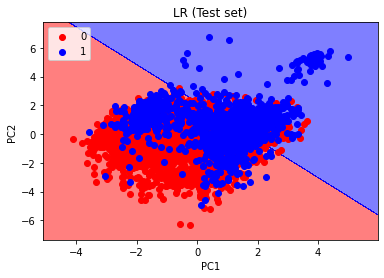

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('LR (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()